In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from nltk import pos_tag, word_tokenize
import re
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data.csv', index_col=0)
model_df = pd.read_csv('Cars make model list.csv')
model_df['Replace'] = model_df['Replace'].str.lower()
model_df['Search'] = model_df['Search'].str.lower()
model_dict = model_df.set_index('Search')['Replace'].to_dict()

In [4]:
from nltk.corpus import stopwords
StopWordslist = stopwords.words("english")

def string_process(s):
    s=str(s)
    lower = s.lower()
    for key, value in model_dict.items():
        lower= lower.replace(key, value)
    words = lower.split()
    refined = []
    for i in words:
        if i not in StopWordslist:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
df['text']=df['message'].map(string_process)

In [5]:
model_set=set(model_dict.values())-{'car','seat','sedan','problem'}
count_df=DataFrame(df['text'])
for i in model_set:
    count_df[i]=0

In [6]:

def count_brand():
    for num in range(len(count_df['text'])):
        for i in model_set:
            if i in count_df['text'][num]:
                count_df.loc[num,i]=1
count_brand()

In [7]:
count_df.drop('text',1, inplace=True)
count_df.loc['Row_sum'] = count_df.apply(lambda x: x.sum())
count_series=count_df.T['Row_sum']
count_series.sort_values(ascending=False)[:10]

honda        2777
toyota       2358
ford         1624
nissan        858
hyundai       853
mazda         750
chevrolet     408
chrysler      334
saturn        334
dodge         290
Name: Row_sum, dtype: int64

# Task A

In [8]:
count_number=count_df.drop('Row_sum')

In [9]:
def lift(a, b):
    total = len(count_number)
    fraq_a = sum(count_number[a])
    fraq_b = sum(count_number[b])
    a_b_df=count_number[[a,b]]
    a_b_df['Col_sum'] = a_b_df.apply(lambda x: x.sum(), axis=1)
    fraq_a_b=len(a_b_df[a_b_df['Col_sum']==2])
    if fraq_a_b==0:
        return .1
    return round((total*fraq_a_b*1.0)/(fraq_a*fraq_b*1.0),2)

In [10]:
top_10=set(count_series.sort_values(ascending=False)[:10].index)
list_10=list(count_series.sort_values(ascending=False)[:10].index)

In [11]:
lift_df=pd.DataFrame(columns=list_10, index=list_10)
for i in list_10:
    for j in list_10:
        lift_df.loc[i,j]=lift(i,j)

In [12]:
lift_df

,honda,toyota,ford,nissan,hyundai,mazda,chevrolet,chrysler,saturn,dodge
honda,2.17,1.35,1.19,1.32,1.43,1.14,1.31,1.37,1.33,1.18
toyota,1.35,2.56,1.3,1.46,1.39,1.19,1.57,1.37,1.55,1.35
ford,1.19,1.3,3.71,1.27,1.27,1.33,1.4,1.39,1.35,1.02
nissan,1.32,1.46,1.27,7.03,1.49,1.45,1.74,1.26,2.48,1.14
hyundai,1.43,1.39,1.27,1.49,7.07,1.23,1.59,1.93,1.63,1.44
mazda,1.14,1.19,1.33,1.45,1.23,8.04,1.22,0.84,0.94,1
chevrolet,1.31,1.57,1.4,1.74,1.59,1.22,14.78,2.21,4.6,1.38
chrysler,1.37,1.37,1.39,1.26,1.93,0.84,2.21,18.05,1.19,3.74
saturn,1.33,1.55,1.35,2.48,1.63,0.94,4.6,1.19,18.05,1.18
dodge,1.18,1.35,1.02,1.14,1.44,1,1.38,3.74,1.18,20.79


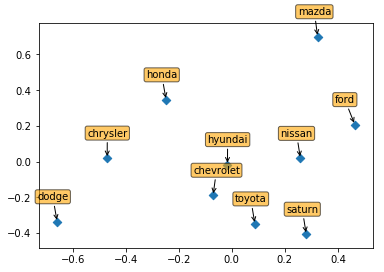

In [48]:
dissimilarity = 1/lift_df

import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

adist = np.array(dissimilarity)
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2,metric=False, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'D'
    )
for label, x, y in zip(dissimilarity.columns.values, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=.2', fc = 'orange', alpha = 0.6),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

# Part B

# Part C

In [14]:
attribute_df = pd.read_csv('attributes.csv')
attribute_df['Replace'] = attribute_df['Replace'].str.lower()
attribute_df['Search'] = attribute_df['Search'].str.lower()
attribute_dict = attribute_df.set_index('Search')['Replace'].to_dict()


In [16]:
def attribute_string_process(s):
    s=str(s)
    lower = s.lower()
    for key, value in attribute_dict.items():
        lower= lower.replace(key, value)
    words = lower.split()
    refined = []
    for i in words:
        if i not in StopWordslist:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
df['attribute_text']=df['message'].map(attribute_string_process)

In [17]:
attribute_set=set(attribute_dict.values())
attribute_count_df=DataFrame(df[['attribute_text','text']])
list_5=list(count_series.sort_values(ascending=False)[:5].index)
for i in attribute_set:
    attribute_count_df[i]=0
for i in model_set:
    attribute_count_df[i]=0

In [18]:
def count_attribute():
    for num in range(len(attribute_count_df['attribute_text'])):
        for i in attribute_set:
            if i in attribute_count_df['attribute_text'][num]:
                attribute_count_df.loc[num,i]=1
count_attribute()
def count_brand():
    for num in range(len(attribute_count_df['text'])):
        for i in model_set:
            if i in attribute_count_df['text'][num]:
                attribute_count_df.loc[num,i]=1
count_brand()

In [19]:
attribute_count_df.drop(['attribute_text','text'],1, inplace=True)
attribute_count_df.loc['Row_sum'] = attribute_count_df.apply(lambda x: x.sum())
attribute_count_series=attribute_count_df.T['Row_sum']
attribute_count_number=attribute_count_df.drop('Row_sum')

In [20]:
def conditional_lift(x,y,z):
    fraq_z = sum(attribute_count_number[z])
    x_y_z=attribute_count_df[[x,y,z]]
    x_y_z['Col_sum'] = x_y_z.apply(lambda x: x.sum(), axis=1)
    x_y_z['x_z']=x_y_z[x]+x_y_z[z]
    x_y_z['y_z']=x_y_z[y]+x_y_z[z]
    fraq_x_y_z=len(x_y_z[x_y_z['Col_sum']==3])
    fraq_x_z=len(x_y_z[x_y_z['x_z']==2])
    fraq_y_z=len(x_y_z[x_y_z['y_z']==2])
    if fraq_z*fraq_x_y_z*fraq_x_z*fraq_y_z==0:
        return .1
    return round((fraq_x_y_z*fraq_z*1.0)/(fraq_y_z*fraq_x_z*1.0),2)


In [21]:
def newlift(a, b):
    total = len(attribute_count_number)
    fraq_a = sum(attribute_count_number[a])
    fraq_b = sum(attribute_count_number[b])
    a_b_df= attribute_count_number[[a,b]]
    a_b_df['Col_sum'] = a_b_df.apply(lambda x: x.sum(), axis=1)
    fraq_a_b=len(a_b_df[a_b_df['Col_sum']==2])
    if fraq_a_b==0:
        return .1
    return round((total*fraq_a_b*1.0)/(fraq_a*fraq_b*1.0),2)

In [22]:
attribute_lift_df=pd.DataFrame(columns=list(attribute_set), index=list_5)
for i in list_5:
    for j in list(attribute_set):
        attribute_lift_df.loc[i,j]=newlift(i,j)
attribute_lift_df

,performance,aesthetics,type,experience,value
honda,1.13,1.23,1.17,1.21,1.19
toyota,1.17,1.24,1.24,1.41,1.21
ford,1.12,1.13,1.17,1.21,1.16
nissan,1.17,1.26,1.26,1.15,1.14
hyundai,1.12,1.42,1.16,1.36,1.22


In [64]:

import networkx as nx    
G = nx.DiGraph()
for i in list_10:
    for j in list_10:
        G.add_weighted_edges_from([(i,j,1/lift(i,j))])

In [65]:
nx.betweenness_centrality(G, weight='weight') 

{'chevrolet': 0.05555555555555555,
 'chrysler': 0.027777777777777776,
 'dodge': 0.0,
 'ford': 0.0,
 'honda': 0.0,
 'hyundai': 0.0,
 'mazda': 0.0,
 'nissan': 0.0,
 'saturn': 0.0,
 'toyota': 0.0}

In [66]:
nx.closeness_centrality(G, distance='weight') 

{'chevrolet': 1.6281780100313363,
 'chrysler': 1.4823871326035825,
 'dodge': 1.2903348596727868,
 'ford': 1.269197882792898,
 'honda': 1.2842888302740842,
 'hyundai': 1.4645379910308958,
 'mazda': 1.1222947259905205,
 'nissan': 1.4424262353626038,
 'saturn': 1.5186549477094113,
 'toyota': 1.383033338050816}

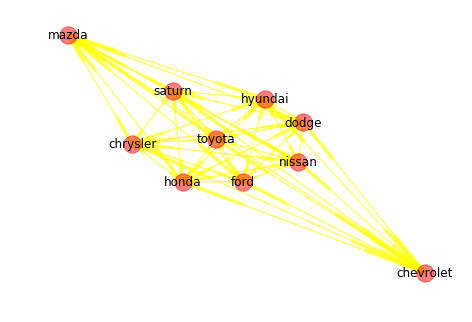

In [71]:
nx.draw(G,with_labels=True, alpha=0.5, edge_color='yellow', weight='weight')

In [80]:
performance_lift_df=pd.DataFrame(columns=list_10, index=list_10)
for i in list_10:
    for j in list_10:
        if i!=j:
            performance_lift_df.loc[i,j]=conditional_lift(i,j,'performance')


In [81]:
performance_lift_df

,honda,toyota,ford,nissan,hyundai,mazda,chevrolet,chrysler,saturn,dodge
honda,NaN,1.25,1.18,1.27,1.35,1.08,1.25,1.32,1.23,1.09
toyota,1.25,NaN,1.28,1.38,1.29,1.15,1.42,1.4,1.31,1.41
ford,1.18,1.28,NaN,1.24,1.32,1.29,1.28,1.36,1.1,0.91
nissan,1.27,1.38,1.24,NaN,1.43,1.41,1.76,1.45,2.28,1.27
hyundai,1.35,1.29,1.32,1.43,NaN,1.15,1.53,1.9,1.57,1.13
mazda,1.08,1.15,1.29,1.41,1.15,NaN,1.15,0.7,0.69,0.94
chevrolet,1.25,1.42,1.28,1.76,1.53,1.15,NaN,2.08,3.64,1.39
chrysler,1.32,1.4,1.36,1.45,1.9,0.7,2.08,NaN,1.09,3.39
saturn,1.23,1.31,1.1,2.28,1.57,0.69,3.64,1.09,NaN,1.24
dodge,1.09,1.41,0.91,1.27,1.13,0.94,1.39,3.39,1.24,NaN


In [88]:
import networkx as nx    
G = nx.DiGraph()
for i in list_5:
    for j in list_5:
        if i!=j:
            G.add_weighted_edges_from([(i,j,1/conditional_lift(i,j,'experience'))])

In [89]:
nx.closeness_centrality(G, distance='weight') 

{'ford': 1.2266259611425714,
 'honda': 1.2209679173463839,
 'hyundai': 1.2485598062254597,
 'nissan': 1.299116323366536,
 'toyota': 1.1842948121645795}

In [90]:
nx.betweenness_centrality(G, weight='weight') 

{'ford': 0.0, 'honda': 0.0, 'hyundai': 0.0, 'nissan': 0.0, 'toyota': 0.0}

# Part E

In [120]:
def purchase(s):
    if 'buy' in s or 'purchase' in s:
        return 1
    else:
        return 0

In [121]:
df['purchase']=df['text'].map(purchase)
count_df=df[['text','purchase']]
def count_brand():
    for num in range(len(count_df['text'])):
        for i in model_set:
            if i in count_df['text'][num]:
                count_df.loc[num,i]=1
count_brand()

In [122]:
def conditional_lift_purchase(x,y):
    fraq_z = sum(df['purchase'])
    x_y_z=count_df[[x,y,'purchase']]
    x_y_z['Col_sum'] = x_y_z.apply(lambda x: x.sum(), axis=1)
    x_y_z['x_z']=x_y_z[x]+x_y_z['purchase']
    x_y_z['y_z']=x_y_z[y]+x_y_z['purchase']
    fraq_x_y_z=len(x_y_z[x_y_z['Col_sum']==3])
    fraq_x_z=len(x_y_z[x_y_z['x_z']==2])
    fraq_y_z=len(x_y_z[x_y_z['y_z']==2])
    if fraq_z*fraq_x_y_z*fraq_x_z*fraq_y_z==0:
        return .1
    return round((fraq_x_y_z*fraq_z*1.0)/(fraq_y_z*fraq_x_z*1.0),2)

In [127]:
import networkx as nx    
G = nx.DiGraph()
for i in list_10:
    for j in list_10:
        if i!=j:
            G.add_weighted_edges_from([(i,j,conditional_lift_purchase(i,j))])

In [128]:
nx.closeness_centrality(G, distance='weight') 

{'chevrolet': 0.6907137375287796,
 'chrysler': 0.8466603951081844,
 'dodge': 0.7908611599297012,
 'ford': 0.7705479452054795,
 'honda': 0.8695652173913042,
 'hyundai': 0.774526678141136,
 'mazda': 0.9782608695652173,
 'nissan': 0.7234726688102893,
 'saturn': 0.7745266781411361,
 'toyota': 0.8249312557286893}